In [13]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context("paper", font_scale=1.3)
sns.set_style({'font.family': 'Times New Roman'})

stations = pd.read_csv('../valencia_metro/data/stations/all_stations.csv', index_col=0)

In [14]:
def interpolate_data(best_result_ltimes, best_result_lbests):
    interpolated_times = [float(t) for t in range(1, 601)]  # Create a list of float times from 1 to max_time 
    interpolated_bests = []

    current_best = float('inf')  # Initialize the current best as infinity

    time_index = 0  # Track the index of the last observed time

    for time in interpolated_times:
        if time >= best_result_ltimes[time_index]:
            current_best = min(current_best, best_result_lbests[time_index])
            if time_index < len(best_result_ltimes) - 1:
                time_index += 1

        interpolated_bests.append(current_best)

    return interpolated_times, interpolated_bests


Computing time results

In [15]:
computingTime = pd.read_csv('results/computingTime.txt', sep=';')
computingTime.head()

days  total_calls      time
0     4          576  0.029377
1     8         1152  0.039677
2    11         1728  0.058862
3    15         2304  0.077532
4    19         2880  0.097653

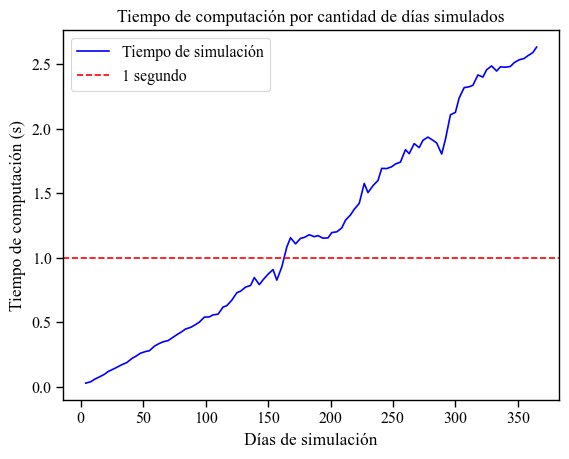

In [16]:
plt.plot(computingTime['days'], computingTime['time'], color='b')

plt.axhline(y=1, color='r', linestyle='--')

plt.legend(['Tiempo de simulación', '1 segundo'])
plt.xlabel('Días de simulación')
plt.ylabel('Tiempo de computación (s)')
plt.title('Tiempo de computación por cantidad de días simulados')
plt.show()

# Resultados Random

In [17]:
resultsRandom = pd.read_csv('results/resultsRandom.txt', sep=';')

In [18]:
resultsRandom.sort_values(by=['fitness'], ascending=True).head(5)

fitness                                         phenotype1  \
5   3.422248  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
8   3.481883  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
29  3.494077  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
23  3.504656  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
13  3.510183  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   

                                           phenotype2  
5    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  
8    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0...  
29   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  
23   0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0...  
13   0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1...

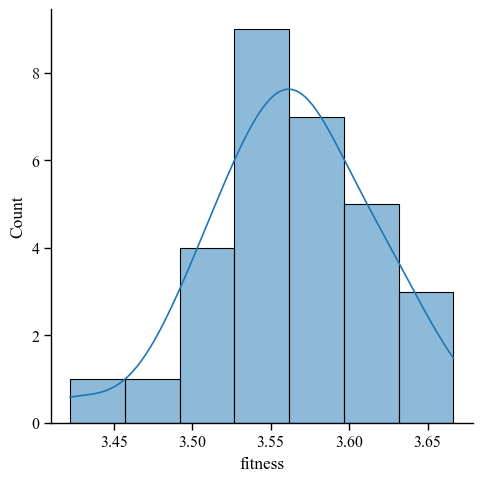

In [19]:
sns.displot(resultsRandom['fitness'], kde=True, rug=False, bins = 7)

In [21]:
resultsRandomBest = pd.read_csv('results/random_experiments/Random6.txt', sep=';')
resultsRandomBest

fitness        time
0  3.752563   56.624335
1  3.617673  113.748739
2  3.606735  170.907140
3  3.591930  227.680335
4  3.422248  393.145063

Text(0.5, 1.0, 'Evolución del tiempo de respuesta en la mejor solución de la búsqueda aleatoria')

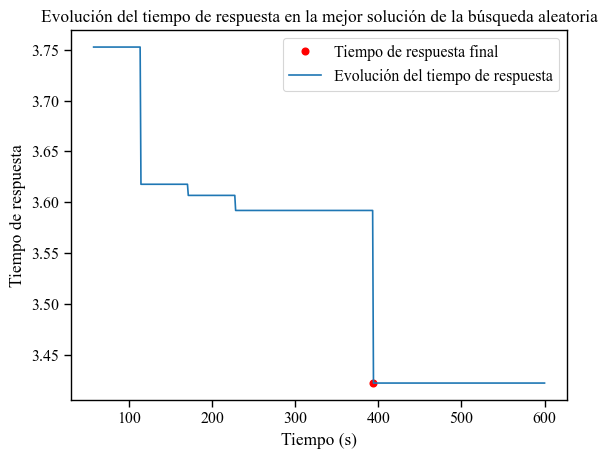

In [24]:
plt.plot(resultsRandomBest['time'].iloc[-1], resultsRandomBest['fitness'].iloc[-1], 'ro')

plt.plot(*interpolate_data(resultsRandomBest['time'], resultsRandomBest['fitness']))

plt.xlabel('Tiempo (s)')

plt.legend(['Tiempo de respuesta final', 'Evolución del tiempo de respuesta'])

plt.ylabel('Tiempo de respuesta')
plt.title('Evolución del tiempo de respuesta en la mejor solución de la búsqueda aleatoria') 

In [25]:
resultsRandomBest['fitness'].mean()

3.5982296859677403

La distribución que propuso:

In [26]:
pheno1 = resultsRandom['phenotype1'].values[0].strip('[]')
pheno2 = resultsRandom['phenotype2'].values[0].strip('[]')
pheno1

'0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'

In [27]:
proposedAmbulances1 = pheno1
proposedAmbulances2 = pheno2
ambulancesBetter = pd.DataFrame(columns=["stationIndex", "class"])
for i, value in enumerate(proposedAmbulances1.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 1]], columns=["stationIndex", "class"])])
for i, value in enumerate(proposedAmbulances2.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 2]], columns=["stationIndex", "class"])])
ambulancesBetter = ambulancesBetter.merge(stations, left_on='stationIndex', right_on='ID')
ambulancesBetter = ambulancesBetter[['stationIndex', 'class', 'NAME', 'x', 'y']]
#add a random number to the coordinates to avoid overlapping
ambulancesBetter['x'] = ambulancesBetter['x'] + np.random.normal(0, 0.0001, len(ambulancesBetter))
ambulancesBetter['y'] = ambulancesBetter['y'] + np.random.normal(0, 0.0001, len(ambulancesBetter))

In [28]:
map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = True)
ambulancesBetterPlace = ambulancesBetter[['y', 'x']].values.tolist()
for i in range(len(ambulancesBetterPlace)):
    if ambulancesBetter['class'].iloc[i] == 1:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
    elif ambulancesBetter['class'].iloc[i] == 2:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj) 

map_obj

# Resultados Tabu

In [29]:
resultsTabu = pd.read_csv('results/resultsTabu.txt', sep=';')
resultsTabu.head()

neighb_p  ncalls  nTabuL   fitness  \
0      0.01       5       5  3.052526   
1      0.01       5       5  3.101869   
2      0.01       5       5  3.083955   
3      0.01       5       5  3.061873   
4      0.01       5       5  3.057576   

                                          phenotype1  \
0  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
1  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0...   
2  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
3  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0...   
4  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   

                                          phenotype2   best_time  best_iter  \
0   0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  241.655084         42   
1   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  166.954822         27   
2   0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0...  491.828767         90   
3   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  174.405757         32   
4   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0...  549.599490        101   

   total_iters                                         list_bests  \
0          109  [3.523728738331709, 3.3793859128001884, 3.1597...   
1          107  [3.571734917959892, 3.5267354536958506, 3.2744...   
2          111  [3.53846845076175, 3.448800852636186, 3.446848...   
3          113  [3.5542401523519986, 3.4444716937438224, 3.339...   
4          110  [3.5289023994181905, 3.386789083155153, 3.2701...   

                                          list_times  
0  [0.0, 22.587228059768677, 38.77453899383545, 7...  
1  [0.0, 22.488012075424194, 27.772483110427856, ...  
2  [0.0, 10.669808864593506, 15.921890020370483, ...  
3  [0.0, 10.81049394607544, 16.1735999584198, 21....  
4  [0.0, 10.885977983474731, 26.682260036468506, ...

In [30]:
resultsTabu.sort_values(by=['fitness'], ascending=True).head(5)

neighb_p  ncalls  nTabuL   fitness  \
123      0.01      15       5  3.021576   
172      0.01      15      10  3.022484   
220      0.01      20      10  3.023006   
180      0.01      20       5  3.029547   
119      0.01      10      10  3.030694   

                                            phenotype1  \
123  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
172  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0...   
220  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0...   
180  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1...   
119  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0...   

                                            phenotype2   best_time  best_iter  \
123   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  363.486533         61   
172   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  502.156761         49   
220   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  464.997550         45   
180   0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0...  567.376096        103   
119   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0...  599.439085         54   

     total_iters                                         list_bests  \
123          102  [3.5354846784598153, 3.4688488946620444, 3.399...   
172           59  [3.580063884790756, 3.467319790788828, 3.37807...   
220           59  [3.4221677821430183, 3.386056815509098, 3.3309...   
180          109  [3.6015207764728445, 3.417715745324307, 3.2939...   
119           55  [3.484360491272915, 3.479418270334351, 3.42937...   

                                            list_times  
123  [0.0, 12.425137996673584, 17.950785875320435, ...  
172  [0.0, 31.632295846939087, 51.48499894142151, 6...  
220  [0.0, 21.829733848571777, 32.2786819934845, 42...  
180  [0.0, 11.142108917236328, 21.666902780532837, ...  
119  [0.0, 24.24434781074524, 35.57173991203308, 46...

In [31]:
resultsTabuAvg = resultsTabu.groupby(['neighb_p', 'ncalls', 'nTabuL']).mean().unstack()
resultsTabuAvg

fitness             best_time              best_iter  \
nTabuL                 5         10          5           10         5    
neighb_p ncalls                                                          
0.01     5       3.087549  3.077683  398.330212  456.555061  72.900000   
         10      3.086961  3.085900  418.849136  448.158891  74.500000   
         15      3.080661  3.084631  406.758045  420.653736  72.033333   
         20      3.091896  3.083450  387.797615  435.852922  71.366667   
0.05     5       3.104386  3.128533  472.028515  506.838711  19.833333   
         10      3.111475  3.137164  471.035475  527.302918  19.700000   
         15      3.103618  3.137328  471.654279  483.736190  19.700000   
         20      3.099439  3.128301  470.500783  512.573554  19.733333   
0.10     5       3.152208  3.201205  457.038756  527.712870  10.200000   
         10      3.137393  3.206789  505.239452  526.565403  10.866667   
         15      3.135000  3.218263  482.397849  531.169332  10.766667   
         20      3.148807  3.222034  485.699032  537.976382  10.833333   

                           total_iters             
nTabuL                  10          5          10  
neighb_p ncalls                                    
0.01     5       44.766667  110.700000  58.966667  
         10      40.433333  107.300000  54.333333  
         15      41.133333  107.266667  59.033333  
         20      42.500000  111.533333  59.333333  
0.05     5       11.300000   25.433333  12.600000  
         10      11.300000   25.233333  12.733333  
         15      10.466667   25.300000  12.733333  
         20      10.966667   25.133333  12.700000  
0.10     5        5.700000   12.733333   6.333333  
         10       5.600000   12.766667   6.266667  
         15       5.600000   12.700000   6.500000  
         20       5.866667   12.633333   6.433333

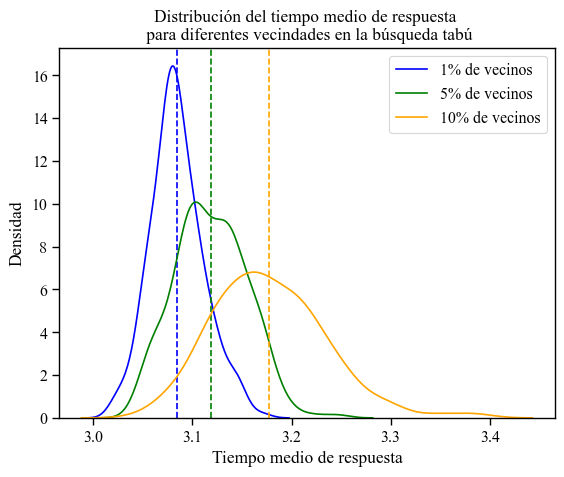

In [33]:
colors = ['blue', 'green', 'orange', 'red', 'purple']
fig, ax = plt.subplots()

n = 0
for group, grouped in resultsTabu.groupby(['neighb_p']):
    sns.kdeplot(data=grouped['fitness'], label=f'{int(group * 100)}% de vecinos', ax=ax, color=colors[n])
    ax.axvline(x=grouped['fitness'].mean(), color=colors[n], linestyle='dashed')
    n += 1
    
plt.title('Distribución del tiempo medio de respuesta \n para diferentes vecindades en la búsqueda tabú')
plt.xlabel('Tiempo medio de respuesta')
plt.ylabel('Densidad')

plt.legend()

plt.show()


In [34]:
data1 = resultsTabu[(resultsTabu['neighb_p'] == 0.01)]['fitness']
data2 = resultsTabu[(resultsTabu['neighb_p'] == 0.05)]['fitness']
data3 = resultsTabu[(resultsTabu['neighb_p'] == 0.1)]['fitness']

print(data1.var())
print(data2.var())
print(data3.var())

print(data1.mean())
print(data2.mean())
print(data3.mean())

print(stats.shapiro(data1))
print(stats.shapiro(data2))
print(stats.shapiro(data3))

print(stats.ttest_ind(data1, data2, equal_var=False))
print(stats.ttest_ind(data1, data3, equal_var=False))
print(stats.ttest_ind(data2, data3, equal_var=False))



0.000703677247672484
0.001283615182339152
0.003251516141980982
3.084841301747296
3.1187805919385094
3.177712290086258
ShapiroResult(statistic=0.9878494143486023, pvalue=0.039947014302015305)
ShapiroResult(statistic=0.9891887307167053, pvalue=0.06942056864500046)
ShapiroResult(statistic=0.976576030254364, pvalue=0.0005276181036606431)
Ttest_indResult(statistic=-11.794444387095833, pvalue=4.317575185263741e-28)
Ttest_indResult(statistic=-22.877145092962902, pvalue=1.2529518309125051e-70)
Ttest_indResult(statistic=-13.556876595537943, pvalue=9.524587111720878e-35)


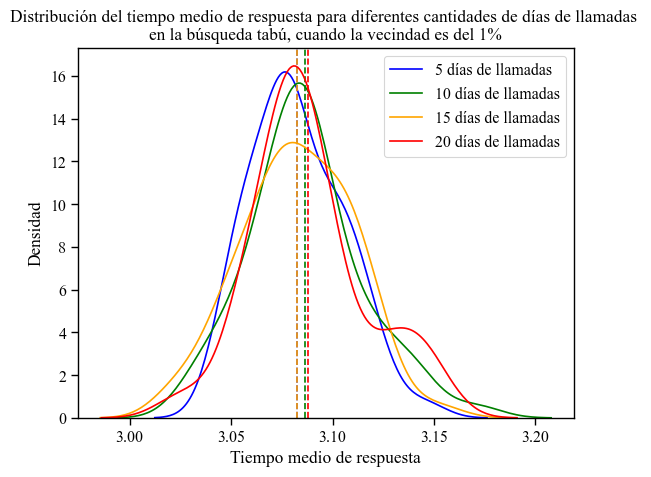

In [38]:
colors = ['blue', 'green', 'orange', 'red', 'purple']
fig, ax = plt.subplots()

n = 0
for group, grouped in resultsTabu.groupby(['neighb_p', "ncalls"]):
    ncalls = group[1]
    if group[0] != 0.01: continue
    sns.kdeplot(data=grouped['fitness'], label=f'{ncalls} días de llamadas', ax=ax, color=colors[n])
    ax.axvline(x=grouped['fitness'].mean(), color=colors[n], linestyle='dashed')
    n += 1
    
plt.title('Distribución del tiempo medio de respuesta para diferentes cantidades de días de llamadas \nen la búsqueda tabú, cuando la vecindad es del 1%')
plt.xlabel('Tiempo medio de respuesta')
plt.ylabel('Densidad')

plt.legend()

plt.show()


In [39]:
data1 = resultsTabu[(resultsTabu['neighb_p'] == 0.01) & (resultsTabu['ncalls'] == 5)]['fitness']
data2 = resultsTabu[(resultsTabu['neighb_p'] == 0.01) & (resultsTabu['ncalls'] == 10)]['fitness']
data3 = resultsTabu[(resultsTabu['neighb_p'] == 0.01) & (resultsTabu['ncalls'] == 15)]['fitness']
data4 = resultsTabu[(resultsTabu['neighb_p'] == 0.01) & (resultsTabu['ncalls'] == 20)]['fitness']

print('Vars:')
print(data1.var())
print(data2.var())
print(data3.var())
print(data4.var())

print('Means:')
print(data1.mean())
print(data2.mean())
print(data3.mean())
print(data4.mean())

print('Shapiro:')
print(stats.shapiro(data1))
print(stats.shapiro(data2))
print(stats.shapiro(data3))
print(stats.shapiro(data4))

print('Wilcoxon:')
print(stats.wilcoxon(data1, data2))
print(stats.wilcoxon(data2, data3))
print(stats.wilcoxon(data3, data4))

print(stats.wilcoxon(data1, data3))
print(stats.wilcoxon(data1, data4))
print(stats.wilcoxon(data2, data4))

Vars:
0.0005210236609015465
0.0007816946019598115
0.0007459116087438255
0.0007811983639861476
Means:
3.082615968117169
3.086430654835061
3.0826457073004736
3.0876728767364807
Shapiro:
ShapiroResult(statistic=0.9761913418769836, pvalue=0.28916043043136597)
ShapiroResult(statistic=0.9720234870910645, pvalue=0.183116614818573)
ShapiroResult(statistic=0.9918195009231567, pvalue=0.959667444229126)
ShapiroResult(statistic=0.9514819979667664, pvalue=0.01829620636999607)
Wilcoxon:
WilcoxonResult(statistic=760.0, pvalue=0.2538497551892068)
WilcoxonResult(statistic=855.0, pvalue=0.6587090742591128)
WilcoxonResult(statistic=871.0, pvalue=0.7460057700658305)
WilcoxonResult(statistic=900.0, pvalue=0.9120730845618369)
WilcoxonResult(statistic=791.0, pvalue=0.3613273432756863)
WilcoxonResult(statistic=869.0, pvalue=0.7348856633962182)


In [40]:
best_result_tabu = resultsTabu.sort_values(by=['fitness'], ascending=True).head(1)

best_result_tabu_lbests = [float(item) for item in best_result_tabu['list_bests'].values[0].strip('[]').split(',')]
best_result_tabu_ltimes = [float(item) for item in best_result_tabu['list_times'].values[0].strip('[]').split(',')]

In [41]:
len(best_result_tabu_ltimes)

17

In [42]:
best_result_tabu

neighb_p  ncalls  nTabuL   fitness  \
123      0.01      15       5  3.021576   

                                            phenotype1  \
123  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   

                                            phenotype2   best_time  best_iter  \
123   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...  363.486533         61   

     total_iters                                         list_bests  \
123          102  [3.5354846784598153, 3.4688488946620444, 3.399...   

                                            list_times  
123  [0.0, 12.425137996673584, 17.950785875320435, ...

In [43]:
best_result_tabu['best_time'].values[0]

363.48653292655945

Text(0.5, 1.0, 'Evolución del tiempo de respuesta en la mejor solución de la búsqueda tabú')

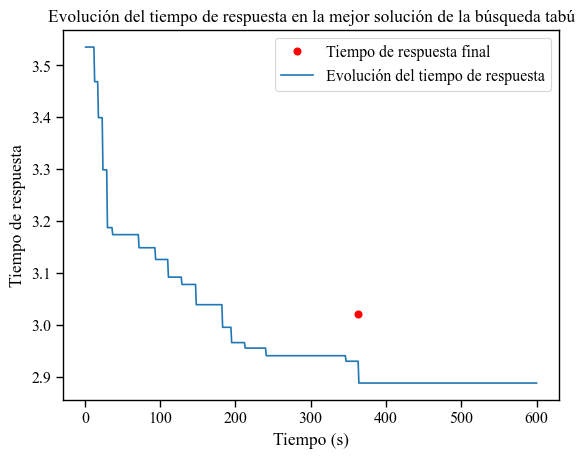

In [47]:
plt.plot(best_result_tabu['best_time'], best_result_tabu['fitness'], 'ro')
plt.plot(*interpolate_data(best_result_tabu_ltimes, best_result_tabu_lbests))

plt.xlabel('Tiempo (s)')

plt.legend(['Tiempo de respuesta final', 'Evolución del tiempo de respuesta'])

plt.ylabel('Tiempo de respuesta')
plt.title('Evolución del tiempo de respuesta en la mejor solución de la búsqueda tabú')

La distribución que propuso:

In [48]:
pheno1 = best_result_tabu['phenotype1'].values[0].strip('[]')
pheno2 = best_result_tabu['phenotype2'].values[0].strip('[]')

proposedAmbulances1 = pheno1
proposedAmbulances2 = pheno2
ambulancesBetter = pd.DataFrame(columns=["stationIndex", "class"])
for i, value in enumerate(proposedAmbulances1.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 1]], columns=["stationIndex", "class"])])
for i, value in enumerate(proposedAmbulances2.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 2]], columns=["stationIndex", "class"])])
ambulancesBetter = ambulancesBetter.merge(stations, left_on='stationIndex', right_on='ID')
ambulancesBetter = ambulancesBetter[['stationIndex', 'class', 'NAME', 'x', 'y']]
#add a random number to the coordinates to avoid overlapping
ambulancesBetter['x'] = ambulancesBetter['x'] + np.random.normal(0, 0.0001, len(ambulancesBetter))
ambulancesBetter['y'] = ambulancesBetter['y'] + np.random.normal(0, 0.0001, len(ambulancesBetter))

In [49]:
map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = True)
ambulancesBetterPlace = ambulancesBetter[['y', 'x']].values.tolist()
for i in range(len(ambulancesBetterPlace)):
    if ambulancesBetter['class'].iloc[i] == 1:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
    elif ambulancesBetter['class'].iloc[i] == 2:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj) 

map_obj

In [50]:
#Neighbourhood experiments

resultsNeighb = pd.read_csv('results/resultsNeighbourhood.txt', sep=';', header=0)

In [51]:
resultsNeighb['list_count_bests'] = resultsNeighb['list_count_bests'].str.strip('Any[]')
resultsNeighb['list_count_times'] = resultsNeighb['list_count_times'].str.strip('Any[]')
resultsNeighb

list_count_bests list_count_times
0              3269             7970
1              6661             7917
2                 0             7942
3              5699             7944
4                56             7948
5              4769             7991
6              6484             7967
7              1675             7955
8              1592             7645
9              5598             7348
10               18             7935
11                0             8010
12              674             7704
13             3527             7651
14                0             7937
15             1860             7610
16              141             7348
17              167             7668
18             5498             7978
19             6213             7665

In [52]:
resultsNeighb['list_count_bests'] = resultsNeighb['list_count_bests'].astype(int)
print(resultsNeighb['list_count_bests'].mean())

resultsNeighb['list_count_times'] = resultsNeighb['list_count_times'].astype(int)
print(resultsNeighb['list_count_times'].mean())

2695.05
7806.65


# Resultados Genético Original

In [53]:
resultsGen1 = pd.read_csv('results/resultsGen.txt', sep=';', header=0)
resultsGen1 = resultsGen1.sort_values(by=['fitness'], ascending=True)

In [54]:
resultsGen1Avg = resultsGen1.groupby(['ncalls']).mean().unstack()
resultsGen1Avg

                ncalls
fitness         5           3.464973
                10          3.478822
                15          3.530023
iters_survived  5          78.066667
                10         49.833333
                15         17.233333
best_time       5         387.525655
                10        351.835297
                15        376.583307
total_iters     5         220.266667
                10        119.666667
                15         50.566667
dtype: float64

In [57]:
colors = ['blue', 'green', 'orange']
fig, ax = plt.subplots()

for ncalls, group in resultsGen1.groupby('ncalls'):
    sns.kdeplot(data=group['fitness'], label=f'{ncalls} días de llamadas', ax=ax, color=colors[ncalls//5 -1])
    ax.axvline(x=group['fitness'].mean(), color=colors[ncalls//5 - 1], linestyle='dashed')
    
plt.title('Distribución de fitness para diferentes cantidades de llamadas en el primer algoritmo genético')
plt.xlabel('Fitness (tiempo de respuesta)')
plt.ylabel('Densidad')

plt.legend()

plt.show()


In [58]:
data1 = resultsGen1[(resultsGen1['ncalls'] == 5)]['fitness']
data2 = resultsGen1[(resultsGen1['ncalls'] == 10)]['fitness']
data3 = resultsGen1[(resultsGen1['ncalls'] == 15)]['fitness']

print('Vars:')
print(data1.var())
print(data2.var())
print(data3.var())

print('Means:')
print(data1.mean())
print(data2.mean())
print(data3.mean())

print('Shapiro:')
print(stats.shapiro(data1))
print(stats.shapiro(data2))
print(stats.shapiro(data3))

print('T-test:')
print(stats.ttest_ind(data1, data2))
print(stats.ttest_ind(data1, data3))
print(stats.ttest_ind(data2, data3))

Vars:
0.002159039097032276
0.0031555075204145046
0.0028110632039674804
Means:
3.4649734484385903
3.478822177806594
3.530022970072838
Shapiro:
ShapiroResult(statistic=0.9678150415420532, pvalue=0.4812529385089874)
ShapiroResult(statistic=0.9527159333229065, pvalue=0.19978074729442596)
ShapiroResult(statistic=0.9639089703559875, pvalue=0.3882600963115692)
T-test:
Ttest_indResult(statistic=-1.0404888851064897, pvalue=0.3024308353269218)
Ttest_indResult(statistic=-5.053846773582627, pvalue=4.621643345609037e-06)
Ttest_indResult(statistic=-3.6305708143528417, pvalue=0.0005995915856727693)


In [60]:
index = 5
resultsGen1_bests = [float(item) for item in resultsGen1['list_bests'].values[index].strip('[]').split(',')]
resultsGen1_times = [float(item) for item in resultsGen1['list_times'].values[index].strip('[]').split(',')]

plt.plot(resultsGen1['best_time'].iloc[index], resultsGen1['fitness'].iloc[index], 'ro')

plt.plot([y for y in range(0, 600+1, round(600/len(resultsGen1_bests)))], resultsGen1_bests)

plt.legend(['Fitness final', 'Evolución del fitness'])

plt.xlabel('Tiempo (s)')
plt.ylabel('Fitness (tiempo de respuesta)')
plt.title('Evolución del fitness en la mejor ejecución del primer algoritmo genético')

Text(0.5, 1.0, 'Evolución del fitness en la mejor ejecución del primer algoritmo genético')

In [61]:
pheno1 = resultsGen1['phenotype1'].values[0].strip('[]')
pheno2 = resultsGen1['phenotype2'].values[0].strip('[]')

proposedAmbulances1 = pheno1
proposedAmbulances2 = pheno2
ambulancesBetter = pd.DataFrame(columns=["stationIndex", "class"])
for i, value in enumerate(proposedAmbulances1.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 1]], columns=["stationIndex", "class"])])
for i, value in enumerate(proposedAmbulances2.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 2]], columns=["stationIndex", "class"])])
ambulancesBetter = ambulancesBetter.merge(stations, left_on='stationIndex', right_on='ID')
ambulancesBetter = ambulancesBetter[['stationIndex', 'class', 'NAME', 'x', 'y']]
#add a random number to the coordinates to avoid overlapping
ambulancesBetter['x'] = ambulancesBetter['x'] + np.random.normal(0, 0.0001, len(ambulancesBetter))
ambulancesBetter['y'] = ambulancesBetter['y'] + np.random.normal(0, 0.0001, len(ambulancesBetter))

In [62]:
map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = True)
ambulancesBetterPlace = ambulancesBetter[['y', 'x']].values.tolist()
for i in range(len(ambulancesBetterPlace)):
    if ambulancesBetter['class'].iloc[i] == 1:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
    elif ambulancesBetter['class'].iloc[i] == 2:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj) 

map_obj

# Resultados Genético Propio

In [63]:
resultsGen = pd.read_csv('results/resultsGen2.txt', sep=';', header=0)

In [64]:
resultsGen

nC1  nC2  ncalls  ngroups_cross  nchildren      pmut  tournamentSel  \
0     30   20      15              4          9  0.491846       0.522413   
1     30   14       5              3          2  0.504689       0.567766   
2     80    6      15              2          5  0.804723       0.757980   
3     20   14      15              1          5  0.002148       0.124213   
4     50   14      10              3          4  0.142011       0.800432   
..   ...  ...     ...            ...        ...       ...            ...   
164   20    2       5              3          9  0.826069       0.681158   
165   10    0       5              5          8  0.868741       0.725080   
166   10    0       5              5          8  0.903735       0.926406   
167   10    0       5              4          8  0.904086       0.734778   
168   10    4       5              5          8  0.878740       0.818930   

     tournamentPart  tournamentBestProb   fitness  best_iter   best_time  \
0                 4            0.995611  3.175959        0.2  554.716595   
1                 6            0.713451  3.064844        8.2  527.926965   
2                 4            0.772200  3.276391        0.0  585.648119   
3                 5            0.801367  3.256493        4.6  514.118251   
4                 3            0.974521  3.134984        0.8  552.169898   
..              ...                 ...       ...        ...         ...   
164               9            0.833643  3.061954        3.6  540.238691   
165              10            0.850768  3.030279        3.6  576.500201   
166              10            0.795110  3.047113        4.8  560.606377   
167              10            0.782635  3.045609        1.2  589.396608   
168              10            0.851201  3.056751        4.6  551.270114   

     total_iters  best_iter_found  
0            7.8              7.6  
1           70.4             62.2  
2            6.0              6.0  
3           34.8             30.2  
4           13.0             12.2  
..           ...              ...  
164         42.8             39.2  
165        108.0            104.4  
166         81.2             76.4  
167        105.6            104.4  
168         64.2             59.6  

[169 rows x 14 columns]

In [65]:
resultsGen['best_iter_found'] = resultsGen['total_iters'] - resultsGen['best_iter']

In [67]:
plt.plot(list(range(1,170)), resultsGen['fitness'])
plt.xlabel('Iteración')
plt.ylabel('Fitness (tiempo de respuesta)')
plt.title('Evolución del fitness promedio en la búsqueda bayesiana (Algoritmo Genético)')

Text(0.5, 1.0, 'Evolución del fitness promedio en la búsqueda bayesiana (Algoritmo Genético)')

In [68]:
resultsGen.sort_values(by=['fitness'], ascending=True).head(10)

nC1  nC2  ncalls  ngroups_cross  nchildren      pmut  tournamentSel  \
165   10    0       5              5          8  0.868741       0.725080   
106   10    0       5              5          9  0.900681       0.417582   
146   10    0       5              4         10  0.715194       0.509438   
62    10    0       5              4          7  0.779131       0.171332   
99    10    0       5              5          9  0.845135       0.119180   
139   10    0       5              4         10  0.735611       0.390791   
115   20    0       5              5          8  0.841422       0.302272   
141   10    0       5              4         10  0.757645       0.402948   
52    10    2       5              4          9  0.552843       0.270591   
65    10    2       5              4          8  0.659509       0.164805   

     tournamentPart  tournamentBestProb   fitness  best_iter   best_time  \
165              10            0.850768  3.030279        3.6  576.500201   
106               9            0.979611  3.032313        6.2  563.190011   
146              10            0.835597  3.032957        6.4  563.702047   
62               10            0.970528  3.033685       56.6  502.057182   
99               10            0.993048  3.034766       49.0  488.132757   
139              10            0.867730  3.035987       13.4  550.385537   
115              10            0.924134  3.036466       12.0  517.070119   
141              10            0.830874  3.036530        8.0  554.956908   
52                9            0.985354  3.038091        4.6  578.748506   
65               10            0.937386  3.038377       31.2  527.332410   

     total_iters  best_iter_found  
165        108.0            104.4  
106        107.8            101.6  
146        113.0            106.6  
62         347.6            291.0  
99         264.8            215.8  
139        165.0            151.6  
115         90.6             78.6  
141        112.4            104.4  
52         145.0            140.4  
65         263.4            232.2

In [69]:
best_result = resultsGen.sort_values(by=['fitness'], ascending=True).head(10)
best_result

best_result = best_result[['fitness', 'best_time', 'best_iter_found', 'best_iter', 'total_iters']]
best_result

fitness   best_time  best_iter_found  best_iter  total_iters
165  3.030279  576.500201            104.4        3.6        108.0
106  3.032313  563.190011            101.6        6.2        107.8
146  3.032957  563.702047            106.6        6.4        113.0
62   3.033685  502.057182            291.0       56.6        347.6
99   3.034766  488.132757            215.8       49.0        264.8
139  3.035987  550.385537            151.6       13.4        165.0
115  3.036466  517.070119             78.6       12.0         90.6
141  3.036530  554.956908            104.4        8.0        112.4
52   3.038091  578.748506            140.4        4.6        145.0
65   3.038377  527.332410            232.2       31.2        263.4

In [70]:
print(stats.pearsonr(resultsGen['tournamentSel'], resultsGen['best_iter']))
print(stats.pearsonr(resultsGen['tournamentSel'], resultsGen['fitness']))

(-0.47362246588140255, 7.845153134214485e-11)
(0.21397729181100328, 0.0052142721573037645)


In [71]:
resultsGenFinal = pd.read_csv('../resultsGen2_2.txt', sep=';', header=0)

In [72]:
resultsGenFinal = resultsGenFinal.sort_values(by=['fitness'], ascending=True)
resultsGenFinal.head()

group   fitness                                             pheno1  \
81     d2  3.019896  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
132    d3  3.029478  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
23     d4  3.033130  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
93     d1  3.040630  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0...   
103    d1  3.041548  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0...   

                                                pheno2  iters_survived  \
81    0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...              12   
132   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0...               1   
23    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...              17   
93    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1...               2   
103   0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...               1   

     time_found  total_iters  \
81   450.977684           48   
132  585.228355           42   
23   542.998710          151   
93   584.118012           41   
103  598.388799           35   

                                            list_bests  \
81   [3.241920182572379, 3.3388152961304676, 3.3859...   
132  [3.493836446736476, 3.461656891650466, 3.35301...   
23   [2.878848096877293, 3.5624619246361804, 3.5619...   
93   [3.421839383650768, 3.474567614165017, 3.38942...   
103  [3.0234096522275866, 3.4819831544678914, 3.422...   

                                            list_times  
81   [0.0, 15.26815414428711, 24.07050108909607, 41...  
132  [0.0, 18.684932947158813, 34.866573095321655, ...  
23   [0.0, 9.656280994415283, 14.220786094665527, 1...  
93   [0.0, 23.77189803123474, 39.03493690490723, 54...  
103  [0.0, 28.378764867782593, 46.715611934661865, ...

In [73]:
resultsGenFinalAvg = resultsGenFinal.groupby(['group']).mean().unstack()
resultsGenFinalAvg

                group
fitness         d1         3.089139
                d2         3.072967
                d3         3.093552
                d4         3.081087
                d5         3.129062
iters_survived  d1         3.200000
                d2         4.700000
                d3         3.533333
                d4        17.000000
                d5         7.200000
time_found      d1       553.329207
                d2       548.137735
                d3       558.511703
                d4       535.908332
                d5       544.011014
total_iters     d1        36.200000
                d2        46.166667
                d3        42.466667
                d4       151.533333
                d5        68.366667
dtype: float64

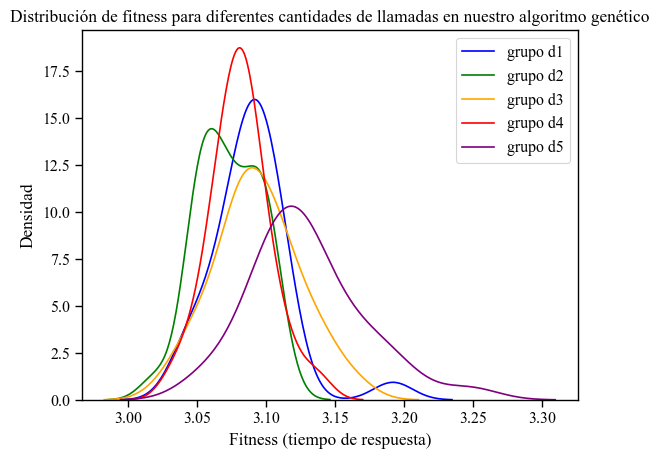

In [76]:
colors = ['blue', 'green', 'orange', 'red', 'purple']
fig, ax = plt.subplots()

n = 0
for group, grouped in resultsGenFinal.groupby('group'):
    sns.kdeplot(data=grouped['fitness'], label=f'grupo {group}', ax=ax, color=colors[n])
    n += 1
    
plt.title('Distribución de fitness para diferentes cantidades de llamadas en nuestro algoritmo genético')
plt.xlabel('Fitness (tiempo de respuesta)')
plt.ylabel('Densidad')

plt.legend()

plt.show()

In [77]:
data1 = resultsGenFinal[(resultsGenFinal['group'] == "d1")]['fitness']
data2 = resultsGenFinal[(resultsGenFinal['group'] == "d2")]['fitness']
data3 = resultsGenFinal[(resultsGenFinal['group'] == "d3")]['fitness']
data4 = resultsGenFinal[(resultsGenFinal['group'] == "d4")]['fitness']
data5 = resultsGenFinal[(resultsGenFinal['group'] == "d5")]['fitness']

print('Vars:')
print(data1.var())
print(data2.var())
print(data3.var())
print(data4.var())
print(data5.var())

print('Means:')
print(data1.mean())
print(data2.mean())
print(data3.mean())
print(data4.mean())
print(data5.mean())

print('Shapiro:')
print(stats.shapiro(data1))
print(stats.shapiro(data2))
print(stats.shapiro(data3))
print(stats.shapiro(data4))
print(stats.shapiro(data5))

print('T-test:')

print('1,2', stats.ttest_ind(data1, data2))
print('1,3', stats.ttest_ind(data1, data3))
print('1,4', stats.ttest_ind(data1, data4))
print('1,5', stats.ttest_ind(data1, data5))
print('2,3', stats.ttest_ind(data2, data3))
print('2,4', stats.ttest_ind(data2, data4))
print('2,5', stats.ttest_ind(data2, data5))
print('3,4', stats.ttest_ind(data3, data4))
print('3,5', stats.ttest_ind(data3, data5))
print('4,5', stats.ttest_ind(data4, data5))


Vars:
0.0007914062556716496
0.000510404541403953
0.0009398096825933786
0.00046551862533831726
0.0016850042099427864
Means:
3.08913890842138
3.0729674596022365
3.0935522575683367
3.081087229292979
3.1290619931132966
Shapiro:
ShapiroResult(statistic=0.877467930316925, pvalue=0.0024672355502843857)
ShapiroResult(statistic=0.9632205367088318, pvalue=0.37337562441825867)
ShapiroResult(statistic=0.9878713488578796, pvalue=0.975633978843689)
ShapiroResult(statistic=0.9849469661712646, pvalue=0.9362814426422119)
ShapiroResult(statistic=0.9522089958190918, pvalue=0.19366906583309174)
T-test:
1,2 Ttest_indResult(statistic=2.4549102734357233, pvalue=0.017112435122468423)
1,3 Ttest_indResult(statistic=-0.5809694462435171, pvalue=0.5635118899386782)
1,4 Ttest_indResult(statistic=1.243919926840197, pvalue=0.2185330178683521)
1,5 Ttest_indResult(statistic=-4.394135066077543, pvalue=4.795574660805919e-05)
2,3 Ttest_indResult(statistic=-2.9606778597564714, pvalue=0.0044412572628899395)
2,4 Ttest_indRes

In [78]:
resultsGenFinal.iloc[0]

group                                                            d2
fitness                                                    3.019896
pheno1            [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
pheno2             0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
iters_survived                                                   12
time_found                                               450.977684
total_iters                                                      48
list_bests        [3.241920182572379, 3.3388152961304676, 3.3859...
list_times        [0.0, 15.26815414428711, 24.07050108909607, 41...
Name: 81, dtype: object

Text(0.5, 1.0, 'Evolución del fitness en la mejor ejecución de nuestro algoritmo genético')

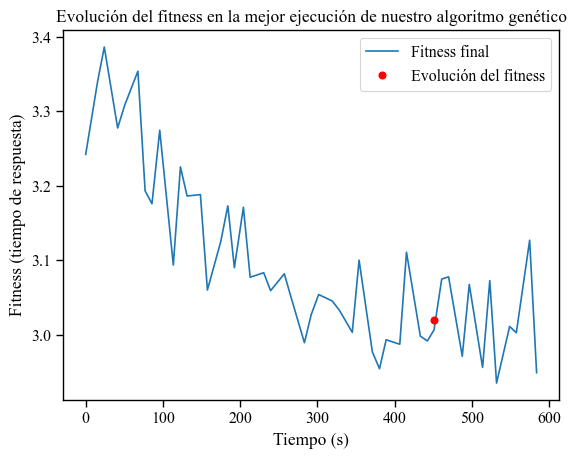

In [80]:
resultsGenFinal_bests = [float(item) for item in resultsGenFinal['list_bests'].values[0].strip('[]').split(',')]
resultsGenFinal_times = [float(item) for item in resultsGenFinal['list_times'].values[0].strip('[]').split(',')]

plt.plot(resultsGenFinal_times, resultsGenFinal_bests)
plt.plot(resultsGenFinal.iloc[0]['time_found'], resultsGenFinal.iloc[0]['fitness'], 'ro')
plt.legend(['Fitness final', 'Evolución del fitness'])

plt.xlabel('Tiempo (s)')
plt.ylabel('Fitness (tiempo de respuesta)')
plt.title('Evolución del fitness en la mejor ejecución de nuestro algoritmo genético')


In [81]:
pheno1 = resultsGenFinal['pheno1'].values[0].strip('[]')
pheno2 = resultsGenFinal['pheno2'].values[0].strip('[]')

proposedAmbulances1 = pheno1
proposedAmbulances2 = pheno2
ambulancesBetter = pd.DataFrame(columns=["stationIndex", "class"])
for i, value in enumerate(proposedAmbulances1.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 1]], columns=["stationIndex", "class"])])
for i, value in enumerate(proposedAmbulances2.split()):
    for _ in range(int(value)):
        ambulancesBetter = pd.concat([ambulancesBetter, pd.DataFrame([[i, 2]], columns=["stationIndex", "class"])])
ambulancesBetter = ambulancesBetter.merge(stations, left_on='stationIndex', right_on='ID')
ambulancesBetter = ambulancesBetter[['stationIndex', 'class', 'NAME', 'x', 'y']]
#add a random number to the coordinates to avoid overlapping
ambulancesBetter['x'] = ambulancesBetter['x'] + np.random.normal(0, 0.0001, len(ambulancesBetter))
ambulancesBetter['y'] = ambulancesBetter['y'] + np.random.normal(0, 0.0001, len(ambulancesBetter))

In [82]:
map_obj = folium.Map(location = [39.432223, -0.480828], zoom_start = 11, scrollWheelZoom = True)
ambulancesBetterPlace = ambulancesBetter[['y', 'x']].values.tolist()
for i in range(len(ambulancesBetterPlace)):
    if ambulancesBetter['class'].iloc[i] == 1:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='red')).add_to(map_obj)
    elif ambulancesBetter['class'].iloc[i] == 2:
        folium.Marker(ambulancesBetterPlace[i], popup=(ambulancesBetter['NAME'].iloc[i], ambulancesBetter['stationIndex'].iloc[i]), icon=folium.Icon(icon="ambulance", prefix='fa', color='green')).add_to(map_obj) 

map_obj

# Resultados finales

Comparación de los mejores resultados promedio

In [85]:
dataRandom = resultsRandom
dataTabu = resultsTabu[(resultsTabu['neighb_p'] == 0.01) & (resultsTabu['ncalls'] == 5) & (resultsTabu['nTabuL'] == 10)]
dataGen1 = resultsGen1[(resultsGen1['ncalls'] == 5)]
dataGen2 = resultsGenFinal[(resultsGenFinal['group'] == "d2")]

Plot distribution 

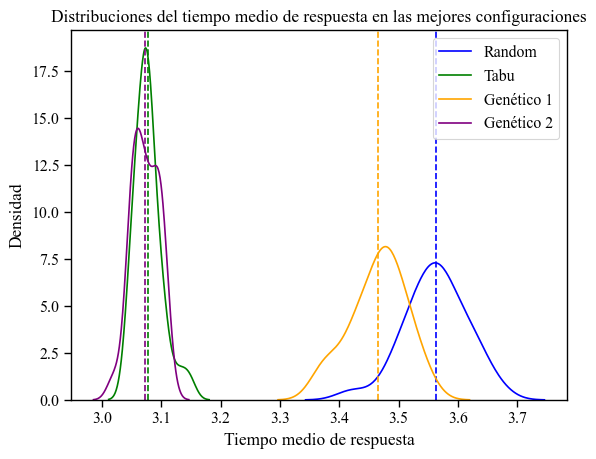

In [88]:
colors = ['blue', 'green', 'orange', 'purple']
labels = ['Random', 'Tabu', 'Genético 1', 'Genético 2']

fig, ax = plt.subplots()

datasets = [dataRandom['fitness'], dataTabu['fitness'],
            dataGen1['fitness'], dataGen2['fitness']]
means = [dataRandom['fitness'].mean(), dataTabu['fitness'].mean(), 
            dataGen1['fitness'].mean(), dataGen2['fitness'].mean()]

for i, dataset in enumerate(datasets):
    sns.kdeplot(data=dataset, color=colors[i], label=labels[i], ax=ax)
    ax.axvline(x=means[i], color=colors[i], linestyle='dashed')

plt.title('Distribuciones del tiempo medio de respuesta en las mejores configuraciones')
plt.xlabel('Tiempo medio de respuesta')
plt.ylabel('Densidad')

plt.legend()

plt.show()


In [140]:
print('Vars:')
print(dataRandom['fitness'].var())  
print(dataTabu['fitness'].var())
print(dataGen1['fitness'].var())
print(dataGen2['fitness'].var())

print('Means:')
print(dataRandom['fitness'].mean())
print(dataTabu['fitness'].mean())
print(dataGen1['fitness'].mean())
print(dataGen2['fitness'].mean())

print('Shapiro:')
print(stats.shapiro(dataRandom['fitness']))
print(stats.shapiro(dataTabu['fitness']))
print(stats.shapiro(dataGen1['fitness']))
print(stats.shapiro(dataGen2['fitness']))

print('T-test:')
print(stats.ttest_ind(dataRandom['fitness'], dataGen1['fitness']))
print(stats.ttest_ind(dataTabu['fitness'], dataGen2['fitness']))

print('Wilcoxon:')
print(stats.wilcoxon(dataRandom['fitness'], dataGen1['fitness']))
print(stats.wilcoxon(dataTabu['fitness'], dataGen2['fitness']))

Vars:
0.0027156075673391107
0.0005143077068275737
0.002159039097032276
0.0005104045414039528
Means:
3.56223765260626
3.0776832847958016
3.4649734484385903
3.0729674596022365
Shapiro:
ShapiroResult(statistic=0.9865328669548035, pvalue=0.9603263139724731)
ShapiroResult(statistic=0.917370080947876, pvalue=0.022934330627322197)
ShapiroResult(statistic=0.9678150415420532, pvalue=0.4812529385089874)
ShapiroResult(statistic=0.9632205367088318, pvalue=0.37337562441825867)
T-test:
Ttest_indResult(statistic=7.6303084474295835, pvalue=2.556260515664301e-10)
Ttest_indResult(statistic=0.8068956273476381, pvalue=0.42302315620546427)
Wilcoxon:
WilcoxonResult(statistic=11.0, pvalue=5.216493447033368e-06)
WilcoxonResult(statistic=190.0, pvalue=0.38203416302245696)


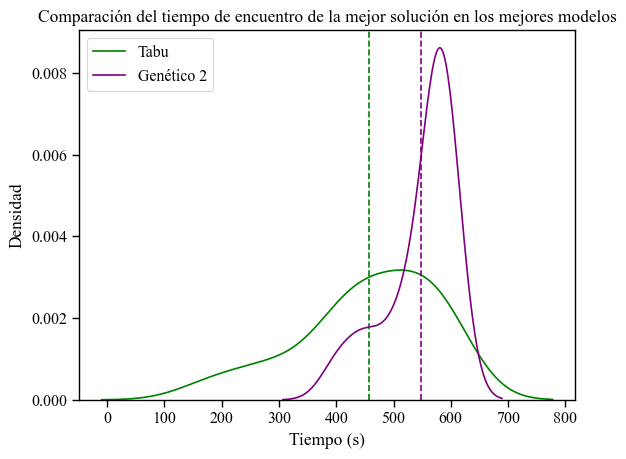

In [89]:
colors = ['green', 'purple']
labels = ['Tabu', 'Genético 2']

fig, ax = plt.subplots()

datasets = [dataTabu['best_time'],
            dataGen2['time_found']]
means = [dataTabu['best_time'].mean(), 
         dataGen2['time_found'].mean()]

for i, dataset in enumerate(datasets):
    sns.kdeplot(data=dataset, color=colors[i], label=labels[i], ax=ax)
    ax.axvline(x=means[i], color=colors[i], linestyle='dashed')

plt.title('Comparación del tiempo de encuentro de la mejor solución en los mejores modelos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Densidad')

plt.legend()

plt.show()